In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data exploration and cleaning

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
sns.set_style('whitegrid')

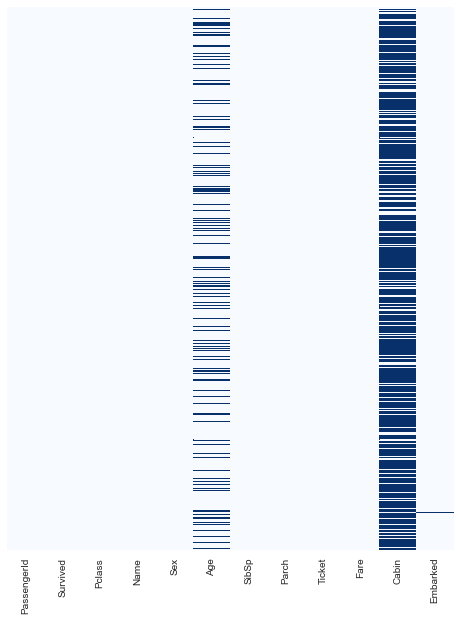

In [7]:
# visualization of missing data in the train dataframe.
plt.figure(figsize=(8,10))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='Blues')

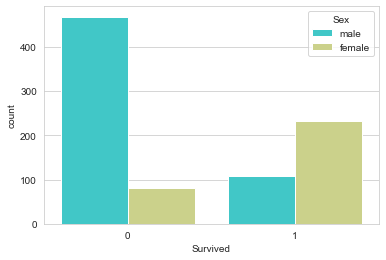

In [8]:
# distribution of survived or not based on sex
sns.countplot(x='Survived', data=train, hue='Sex', palette='rainbow')

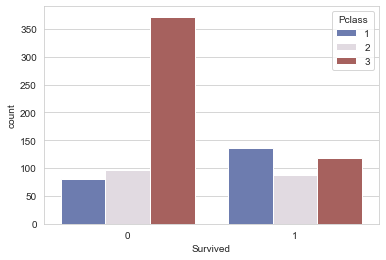

In [9]:
# distribution of survived or not based on passenger class
sns.countplot(x='Survived', data=train, hue='Pclass', palette='twilight_shifted')

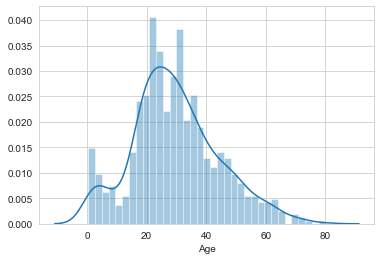

In [10]:
# distribution of passengers' age
sns.distplot(train['Age'].dropna(), bins=35)

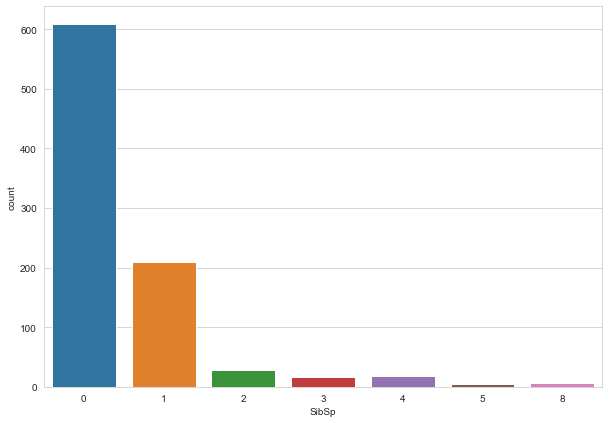

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(x='SibSp', data=train)

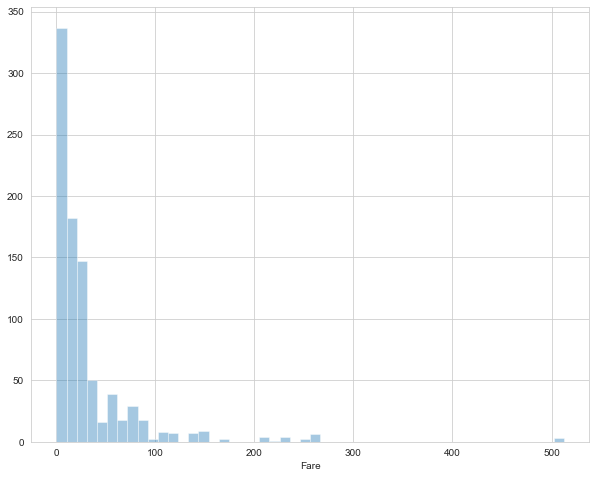

In [49]:
plt.figure(figsize=(10,8))
sns.distplot(train['Fare'], kde=False)

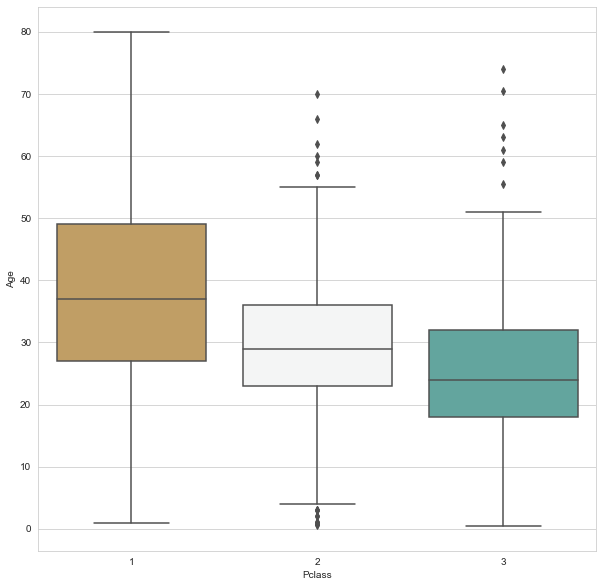

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass', y='Age', data=train, palette='BrBG')

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [16]:
# fill the na with the average value
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

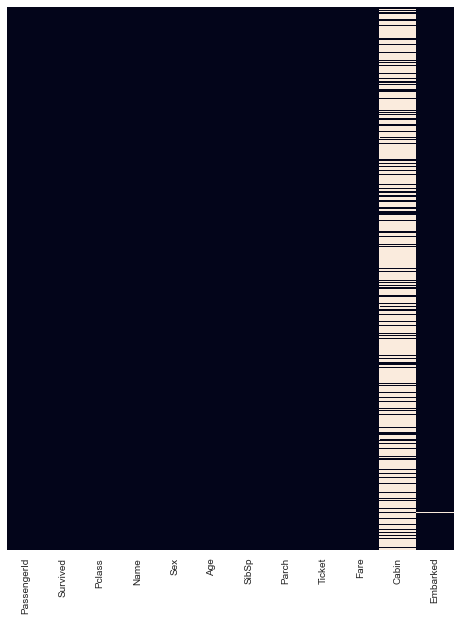

In [17]:
plt.figure(figsize=(8,10))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False)

In [18]:
train.drop('Cabin', axis=1, inplace=True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


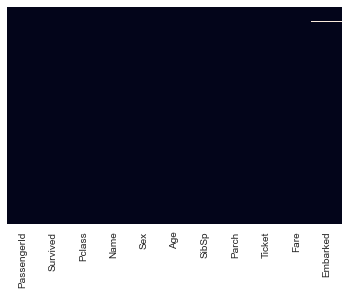

In [20]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False)

In [21]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [22]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [23]:
train = pd.concat([train, sex, embarked], axis=1)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [25]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [28]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [29]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [30]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression(max_iter=10000)

In [37]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [38]:
predictions = logmodel.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test, predictions)

array([[134,  20],
       [ 38,  76]], dtype=int64)